In [126]:
import requests
import json
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
from config import api_key

pd.options.display.float_format = "{:,.2f}".format

allmovies_df = pd.read_csv("allmoviesdata.csv")
allmovies_df["Director"]=allmovies_df["Director"].astype('string')
allmovies_df

,Movie ID,Rank,Title,Production Budget,Domestic Gross,Worldwide Gross,Main Genre,2nd Genre,3rd Genre,IMDB Rating,Studio,Worldwide_gross,Year,IMDb ID,Director
0,0,48,Black Panther,"200,000,000.00","700,059,566.00","1,336,494,320.00",Action,Adventure,Drama,7.40,Walt Disney Pictures,"$700,059,566",2018,NaN,Ryan Coogler
1,1,5,Avengers: Infinity War,"300,000,000.00","678,815,482.00","2,048,359,754.00",Action,Adventure,Sci-Fi,8.50,Walt Disney Pictures,"$678,815,482",2018,NaN,"Anthony Russo, Joe Russo"
2,2,50,Incredibles 2,"200,000,000.00","608,581,744.00","1,242,805,359.00",Animation,Action,Adventure,7.80,Pixar,"$608,581,744",2018,NaN,Brad Bird
3,3,144,Jurassic World: Fallen Kingdom,"170,000,000.00","417,719,760.00","1,308,323,302.00",Action,Adventure,Drama,6.20,Universal Pictures,"$416,769,345",2018,NaN,J.A. Bayona
4,4,11,Solo: A Star Wars Story,"275,000,000.00","213,767,512.00","393,151,347.00",Action,Adventure,Drama,7.00,Walt Disney Pictures,"$213,767,512",2018,NaN,Ron Howard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,204,"4,918",Annie Hall,"4,000,000.00","38,251,425.00","38,251,425.00",Romance,Drama,Comedy,8.10,Metro-Goldwyn-Mayer,"$38,251,425.00",1977,tt0075686,Woody Allen
217,205,"2,387",The Omen,"25,000,000.00","54,607,383.00","119,295,584.00",Thriller,Horror,Drama,7.60,20th Century Fox,"$60,922,980.00",1976,tt0075005,Richard Donner
218,206,44,King Kong,"207,000,000.00","218,080,025.00","550,517,357.00",Horror,Fantasy,Adventure,5.80,Paramount Pictures,"$52,614,445.00",1976,tt0074751,John Guillermin
219,207,445,Midway,"100,000,000.00","56,846,802.00","126,815,030.00",History,Drama,Action,6.70,Universal Pictures,"$43,220,000.00",1976,tt0074899,Jack Smight


In [127]:
#Creating a dataframe of directors, their budget, and gross for thier movies
directormoviecount = allmovies_df.groupby(["Director"]).count()["Title"]
directorbudget = allmovies_df.groupby(["Director"]).mean()[("Production Budget")]
directordomestic = allmovies_df.groupby(["Director"]).mean()["Domestic Gross"]
directorworldwide = allmovies_df.groupby(["Director"]).mean()["Worldwide Gross"]
directors_df = pd.DataFrame({"Number of Movies":directormoviecount,
                            "Average Budget": (directorbudget/1000000),
                            "Average Domestic Gross": (directordomestic/1000000),
                            "Average Worldwide Gross": (directorworldwide/1000000)})
directors_df["Average Budget"] = directors_df["Average Budget"].astype(float)
directors_df["Average Domestic Gross"] = directors_df["Average Domestic Gross"].astype(float)
directors_df["Average Worldwide Gross"] = directors_df["Average Worldwide Gross"].astype(float)




In [156]:
#Dataframe of top directors based on the number of movies that they made
moviedirect_df = directors_df.sort_values("Number of Movies", ascending=False)
moviedirect10_df = moviedirect_df.head(10)
moviedirect_df

,Number of Movies,Average Budget,Average Domestic Gross,Average Worldwide Gross
Director,,,,
Steven Spielberg,8,68.19,244.13,568.24
Michael Bay,8,157.81,248.99,673.23
Richard Donner,5,54.00,105.84,228.96
Zack Snyder,4,212.00,265.26,662.63
Roland Emmerich,4,140.00,214.92,665.00
...,...,...,...,...
John Guillermin,1,207.00,218.08,550.52
"Carlos Saldanha, Michael Thurmeier",1,90.00,196.57,886.69
John G. Avildsen,1,40.00,176.59,351.77


In [157]:
#Dataframe of top directors based the average budget
budgdirect_df = directors_df.sort_values("Average Budget", ascending=False)
budgdirect10_df = budgdirect_df.head(10)
budgdirect_df

,Number of Movies,Average Budget,Average Domestic Gross,Average Worldwide Gross
Director,,,,
Rob Marshall,1,379.00,241.07,"1,045.71"
Joss Whedon,2,295.00,541.18,"1,455.21"
"Roger Allers, Rob Minkoff",1,260.00,543.64,"1,647.73"
"Nathan Greno, Byron Howard",1,260.00,200.82,583.78
"Anthony Russo, Joe Russo",3,240.00,448.88,"1,304.89"
...,...,...,...,...
Hugh Hudson,1,5.50,61.56,61.91
Blake Edwards,1,5.00,41.83,41.83
Randal Kleiser,1,4.50,47.92,47.92


### Directors with the most number of movies, comparing their budget with their gross outcome. 

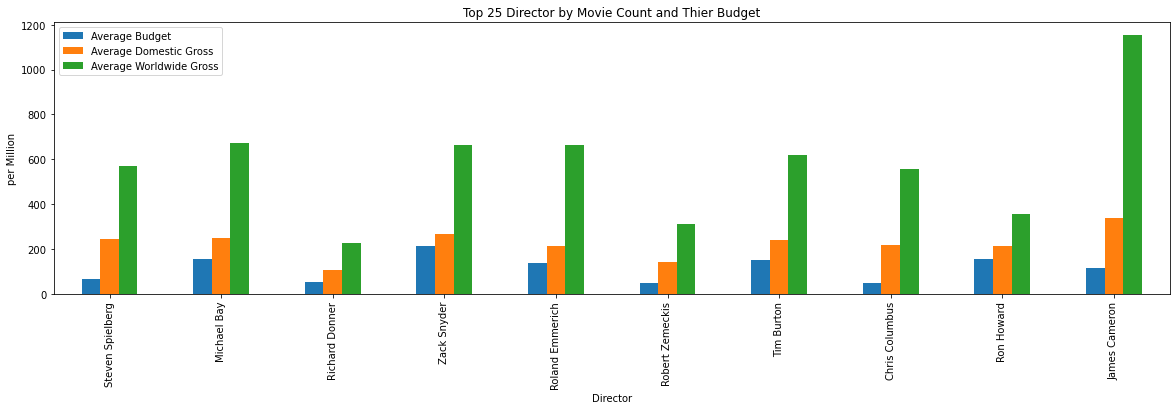

In [158]:
moviedirect10_df = moviedirect10_df.drop(["Number of Movies"], axis=1, inplace = False)
moviecountbar = moviedirect10_df.plot.bar(xlabel="Director", ylabel="per Million", 
            title = "Top 25 Director by Movie Count and Thier Budget", figsize=(20,5))

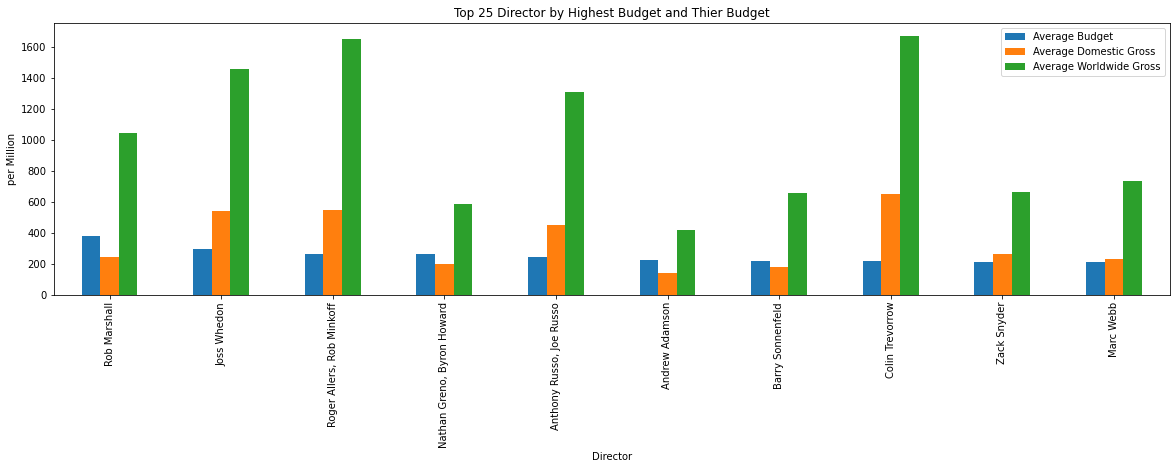

In [159]:
budgdirect10_df = budgdirect10_df.drop(["Number of Movies"], axis=1, inplace = False)
budgetbar = budgdirect10_df.plot.bar(xlabel="Director", ylabel="per Million", 
            title = "Top 25 Director by Highest Budget and Thier Budget", figsize=(20,5))

In [162]:
countdomgross = moviedirect_df["Average Budget"]/moviedirect_df["Average Domestic Gross"]
budgetdomgross = budgdirect_df["Average Budget"]/budgdirect_df["Average Domestic Gross"]
perdomincrease = pd.DataFrame(zip(countdomgross,budgetdomgross))
perdomincrease.to_csv("datacreatedcsv/perdomincrease.csv", index_label="Director ID")
